In [2]:
import cv2
import csv
import os

import numpy as np  #computational operations
import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to visualize data on a graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour


%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (3, 3)      # setting default size of plots

In [3]:


# Define desired resize dimensions
desired_width = 560
desired_height = 500

def resize_and_segment(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if image read successfully
    if image is None:
        print(f"Error reading image: {image_path}")
        return None

    # Resize the image
    resized_image = cv2.resize(image, (desired_width, desired_height), interpolation=cv2.INTER_AREA)

    # Convert the image to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image with inverted colors
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours from the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an all black mask with the same dimensions as the resized image
    mask = np.zeros_like(resized_image)

    # Fill the detected contours on the mask with white
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Bitwise AND operation to apply the mask to the resized image
    segmented_image = cv2.bitwise_and(resized_image, mask)


        
    if resized_image is not None:

        # Display the segmented image
        cv2.imshow("Segmented Image", segmented_image)
        cv2.waitKey(0)

        # Close all windows
        cv2.destroyAllWindows()
    else:
        print(f"Failed to process image: {image_path}")

    # Return both the resized and segmented images
    return resized_image, segmented_image


In [5]:
def euclidean(histo, histoo):
    return np.linalg.norm(histo - histoo)

def plot_rgb_histogram(hist, color, label):
    plt.plot(hist, color=color, label=label)

In [4]:
types = {}

image_path = 'Dataset/train/apple/Image_31.jpg'
resized_image, segmented_image = resize_and_segment(image_path)
types['apple'] = segmented_image

image_path2 = 'Dataset/train/banana/Image_57.jpg'
resized_image, segmented_image2 = resize_and_segment(image_path2)
types['banana'] = segmented_image2

image_path3 = 'Dataset/train/carrot/Image_2.jpg'
resized_image, segmented_image3 = resize_and_segment(image_path3)
types['carrot'] = segmented_image3

image_path4 = 'Dataset/train/capsicum/Image_46.jpg'
resized_image, segmented_image4 = resize_and_segment(image_path4)
types['capsicum'] = segmented_image4

image_path5 = 'Dataset/train/ginger/Image_4.jpg'
resized_image, segmented_image5 = resize_and_segment(image_path5)
types['ginger'] = segmented_image5

#adding another image 
image_path6 = 'Dataset/train/jalepeno/Image_4.jpg'
resized_image, segmented_image6 = resize_and_segment(image_path6)
types['jalepeno'] = segmented_image6

#adding another image
image_path7 = 'Dataset/train/kiwi/Image_10.jpg'
resized_image, segmented_image7 = resize_and_segment(image_path7)
types['kiwi'] = segmented_image7

#adding another image lemon 
image_path8 = 'Dataset/train/lemon/Image_2.jpg'
resized_image, segmented_image8 = resize_and_segment(image_path8)
types['lemon'] = segmented_image8


#adding another image onion
image_path9 = 'Dataset/train/onion/Image_5.jpg'
resized_image, segmented_image9 = resize_and_segment(image_path9)
types['onion'] = segmented_image9


#adding another image pear
image_path11 = 'Dataset/train/pear/Image_13.jpg'
resized_image, segmented_image11 = resize_and_segment(image_path11)
types['pear'] = segmented_image11


#adding another image potato
image_path12 = 'Dataset/train/potato/Image_45.jpg'
resized_image, segmented_image12 = resize_and_segment(image_path12)
types['potato'] = segmented_image12


#adding another image tomato
image_path13 = 'Dataset/train/tomato/Image_77.jpg'
resized_image, segmented_image13 = resize_and_segment(image_path13)
types['tomato'] = segmented_image13


#adding another image watermelon
image_path14 = 'Dataset/train/watermelon/Image_1.jpg'
resized_image, segmented_image14 = resize_and_segment(image_path14)
types['watermelon'] = segmented_image14


#adding corn 
image_path15 = 'Dataset/train/corn/Image_4.jpg'
resized_image, segmented_image15 = resize_and_segment(image_path15)
types['corn'] = segmented_image15


#adding cucumber
image_path16 = 'Dataset/train/cucumber/Image_5.jpg'
resized_image, segmented_image16 = resize_and_segment(image_path16)
types['cucumber'] = segmented_image16


#adding eggplant
image_path17 = 'Dataset/train/eggplant/Image_30.jpg'
resized_image, segmented_image17 = resize_and_segment(image_path17)
types['eggplant'] = segmented_image17


#adding pomegranate
image_path18 = 'Dataset/train/pomegranate/Image_61.jpg'
resized_image, segmented_image18 = resize_and_segment(image_path18)
types['pomegranate'] = segmented_image18


#adding lettuce 
image_path19 = 'Dataset/train/lettuce/Image_3.jpg'
resized_image, segmented_image19 = resize_and_segment(image_path19)
types['lettuce'] = segmented_image19


#adding mango 
image_path20 = 'Dataset/train/mango/Image_10.jpg'
resized_image, segmented_image20 = resize_and_segment(image_path20)
types['mango'] = segmented_image20




# if resized_image is not None:

#     # Display the segmented image
#     cv2.imshow("Segmented Image", segmented_image20)
#     cv2.waitKey(0)

#     # Close all windows
#     cv2.destroyAllWindows()
# else:
#     print(f"Failed to process image: {image_path}")

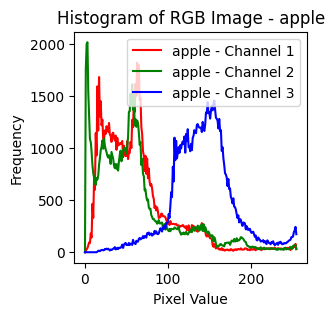

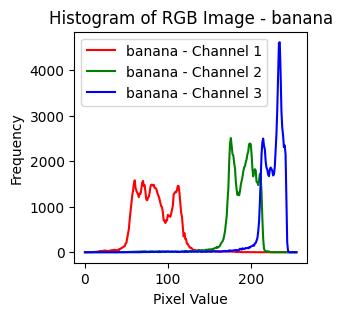

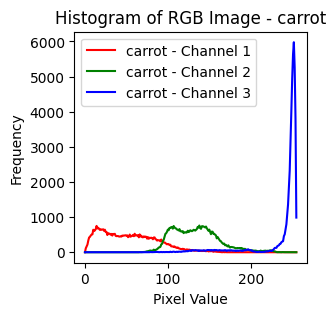

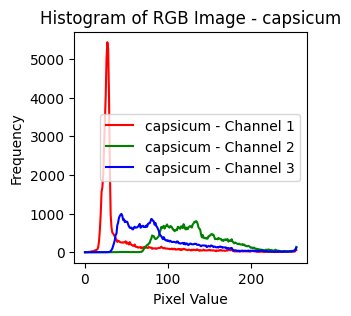

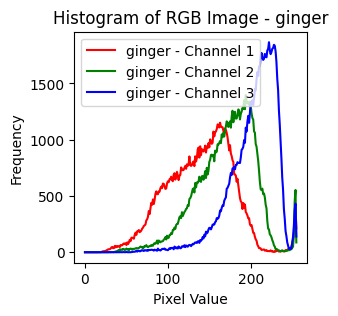

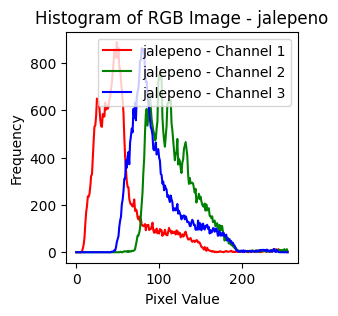

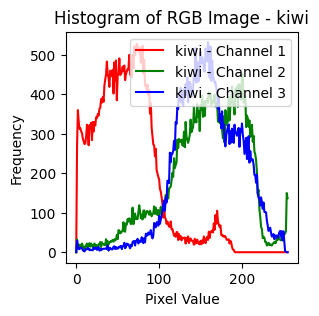

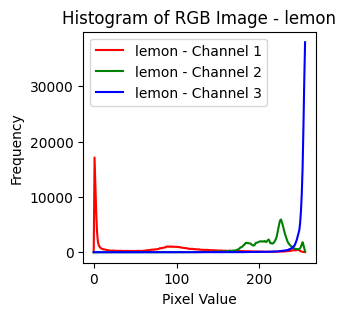

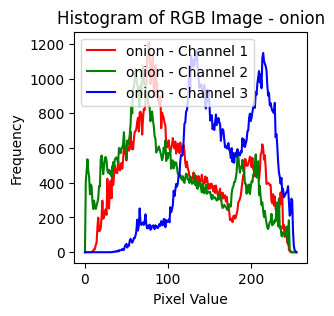

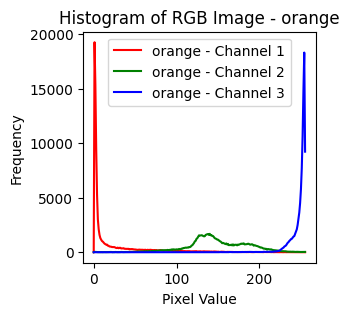

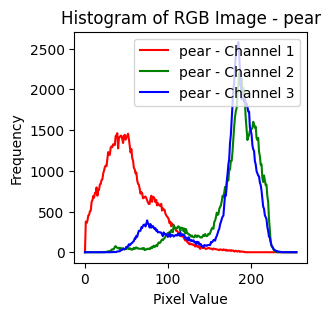

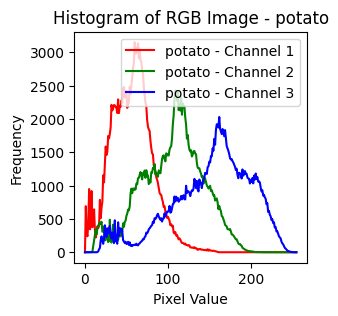

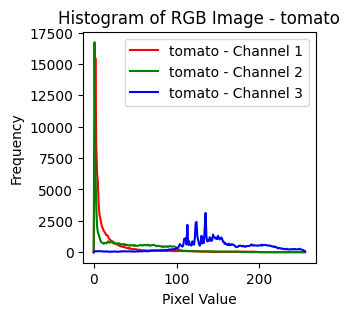

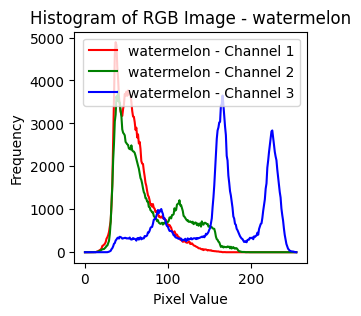

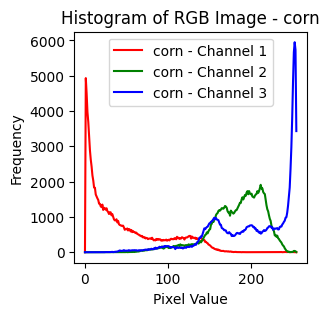

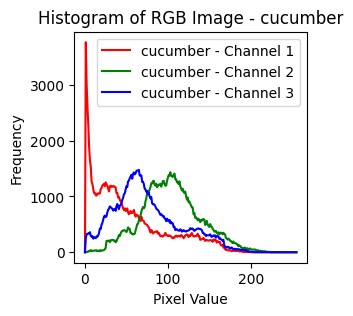

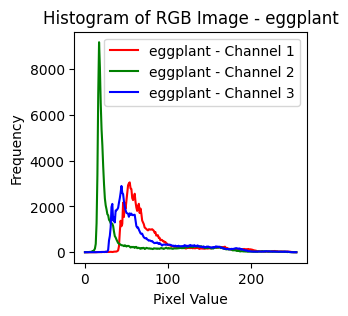

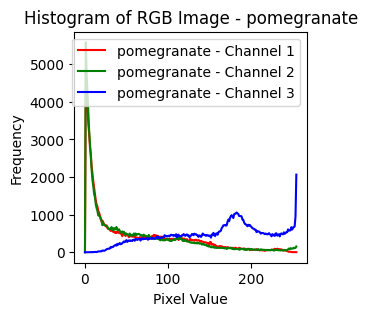

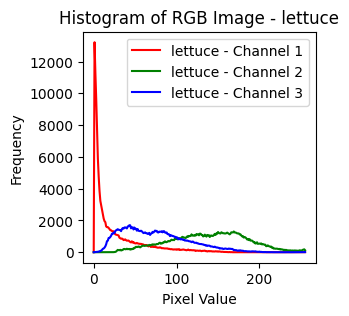

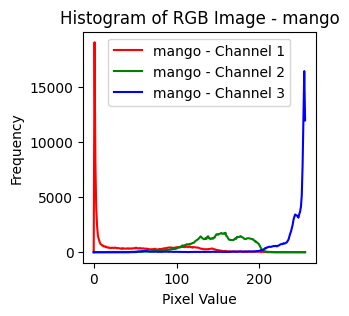

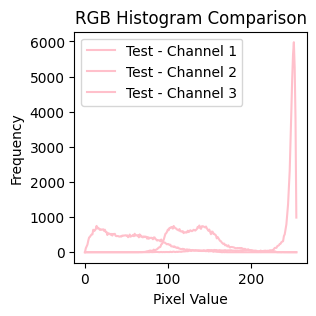

The image pair with the shortest distance is: carrot with a distance of 0.0


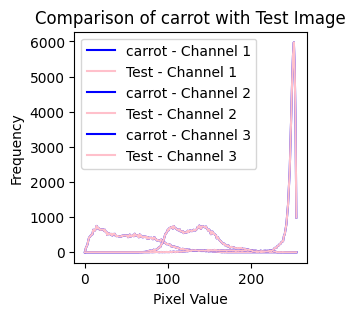

In [21]:
def euclidean(histo, histoo):
    # Calculate the Euclidean distance between histograms in the lists
    distances = [np.linalg.norm(h1 - h2) for h1, h2 in zip(histo, histoo)]
    # Return the average distance
    return np.mean(distances)

def plot_rgb_histogram(hist, color, label):
    plt.plot(hist, color=color, label=label)

def histo(types, test):
    num_bins = 256
    colors = ['red', 'green', 'blue']

    # Calculate histograms for the test image
    test_hist_channels = []
    for i in range(test.shape[2]):
        channel = test[:, :, i]
        non_black_pixels = channel[channel > 0]
        hist = cv2.calcHist([non_black_pixels], [0], None, [num_bins], [0, 256])
        test_hist_channels.append(hist)

    distances = {}

    comparison_hist_channels = []  # To store histograms for comparison
    min_distance = float('inf')
    min_distance_key = None

    for key, value in types.items():
        hist_channels = []
        for i in range(value.shape[2]):
            channel = value[:, :, i]
            non_black_pixels = channel[channel > 0]
            hist = cv2.calcHist([non_black_pixels], [0], None, [num_bins], [0, 256])
            hist_channels.append(hist)

        # Plot histograms for each image in types dictionary
        for i in range(value.shape[2]):
            plot_rgb_histogram(hist_channels[i], color=colors[i], label=f'{key} - Channel {i+1}')

        plt.title(f'Histogram of RGB Image - {key}')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

        # Calculate distances between histograms
        distance = euclidean(hist_channels, test_hist_channels)

        # Store distances and corresponding image pairs in a dictionary
        distances[key] = distance

        # Keep the histogram of the closest image for comparison
        if distance < min_distance:
            min_distance = distance
            min_distance_key = key
            comparison_hist_channels = hist_channels

    # Plot test histogram and comparison
    for i in range(test.shape[2]):
        plot_rgb_histogram(test_hist_channels[i], color='pink', label=f'Test - Channel {i+1}')

    plt.title('RGB Histogram Comparison')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Print the image pair with the shortest distance
    print(f"The image pair with the shortest distance is: {min_distance_key} with a distance of {distances[min_distance_key]}")

    # Plot histogram comparing the image with the shortest distance to the test image
    for i in range(test.shape[2]):
        plot_rgb_histogram(comparison_hist_channels[i], color='blue', label=f'{min_distance_key} - Channel {i+1}')
        plot_rgb_histogram(test_hist_channels[i], color='pink', label=f'Test - Channel {i+1}')

    plt.title(f'Comparison of {min_distance_key} with Test Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Adding test image 
image_path20 = 'Dataset/train/carrot/Image_2.jpg'
resized_image, test = resize_and_segment(image_path20)

# Call histo function with the 'types' dictionary and the test image
histo(types, test)

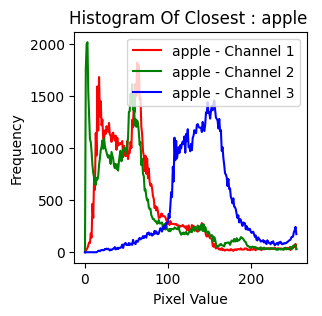

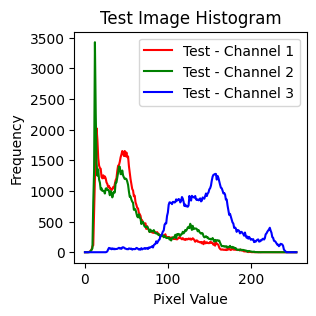

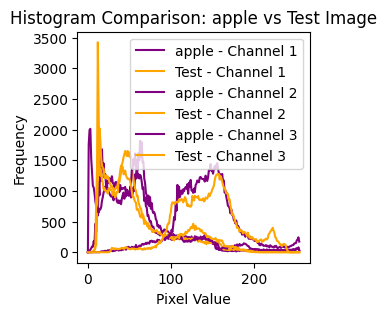

In [5]:
def euclidean(histo, histoo):
    distances = [np.linalg.norm(h1 - h2) for h1, h2 in zip(histo, histoo)]
    return np.mean(distances)

def plot_rgb_histogram(hist, color, label):
    plt.plot(hist, color=color, label=label)

def histo(types, test):
    num_bins = 256
    colors = ['red', 'green', 'blue']

    # Calculate histograms for the test image
    test_hist_channels = []
    for i in range(test.shape[2]):
        channel = test[:, :, i]
        non_black_pixels = channel[channel > 0]
        hist = cv2.calcHist([non_black_pixels], [0], None, [num_bins], [0, 256])
        test_hist_channels.append(hist)

    distances = {}
    comparison_hist_channels = []
    min_distance = float('inf')
    min_distance_key = None

    for key, value in types.items():
        hist_channels = []
        for i in range(value.shape[2]):
            channel = value[:, :, i]
            non_black_pixels = channel[channel > 0]
            hist = cv2.calcHist([non_black_pixels], [0], None, [num_bins], [0, 256])
            hist_channels.append(hist)

        distance = euclidean(hist_channels, test_hist_channels)
        distances[key] = distance

        if distance < min_distance:
            min_distance = distance
            min_distance_key = key
            comparison_hist_channels = hist_channels

    # Plot histogram of the closest image
    for i in range(test.shape[2]):
        plot_rgb_histogram(comparison_hist_channels[i], color=colors[i], label=f'{min_distance_key} - Channel {i+1}')
       

    plt.title(f'Histogram Of Closest : {min_distance_key} ')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Plot histogram of the test image
    for i in range(test.shape[2]):
        plot_rgb_histogram(test_hist_channels[i], color=colors[i], label=f'Test - Channel {i+1}')

    plt.title('Test Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


     # Plot histogram of the closest image
    for i in range(test.shape[2]):
        plot_rgb_histogram(comparison_hist_channels[i], color='purple', label=f'{min_distance_key} - Channel {i+1}')
        plot_rgb_histogram(test_hist_channels[i], color='orange', label=f'Test - Channel {i+1}')

    plt.title(f'Histogram Comparison: {min_distance_key} vs Test Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Adding test image 
image_path21 = 'Dataset/train/apple/Image_1.jpg'
resized_image, test = resize_and_segment(image_path21)

# Call histo function with the 'types' dictionary and the test image
histo(types, test)